# Step1: Load Data

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

# Load data from SpaceX API
# url = 'https://api.spacexdata.com/v4/launches'
# response = requests.get(url)
# data = response.json()
# df = pd.json_normalize(data)
# df = df[['success', 'flight_number']].dropna()
# df
data = pd.read_csv("spacex_cleaned.csv")
df = pd.DataFrame(data)
df

,mission_name,launch_date,rocket_name,payload_mass,orbit,site_name,location,success,weather_condition
0,FalconSat,2006-03-24T22:30:00.000Z,Falcon 1,20.0,LEO,Kwajalein Atoll,Omelek Island,False,Clear
1,DemoSat,2007-03-21T01:10:00.000Z,Falcon 1,NaN,LEO,Kwajalein Atoll,Omelek Island,False,Clear
2,Trailblazer,2008-08-03T03:34:00.000Z,Falcon 1,NaN,LEO,Kwajalein Atoll,Omelek Island,False,Clear
3,RatSat,2008-09-28T23:15:00.000Z,Falcon 1,165.0,LEO,Kwajalein Atoll,Omelek Island,True,Clear
4,RazakSat,2009-07-13T03:35:00.000Z,Falcon 1,200.0,LEO,Kwajalein Atoll,Omelek Island,True,Clear
...,...,...,...,...,...,...,...,...,...
200,Transporter-6,2022-12-01T00:00:00.000Z,Falcon 9,NaN,NaN,CCSFS SLC 40,Cape Canaveral,NaN,Clear
201,TTL-1,2022-12-01T00:00:00.000Z,Falcon 9,NaN,PO,VAFB SLC 4E,Vandenberg Space Force Base,NaN,Clear
202,WorldView Legion 1 & 2,2022-12-01T00:00:00.000Z,Falcon 9,NaN,SSO,CCSFS SLC 40,Cape Canaveral,NaN,Clear
203,Viasat-3 & Arcturus,2022-12-01T00:00:00.000Z,Falcon Heavy,NaN,NaN,KSC LC 39A,Cape Canaveral,NaN,Clear


# Step2: Feature Engineering

In [44]:
# # Simulate payload mass for illustration since it's not directly provided
# np.random.seed(42)
# df['payload_mass_kg'] = np.random.normal(loc=5000, scale=1500, size=len(df))
df['success'] = df['success'].astype(int)
# df = df[['payload_mass_kg', 'success']]
df.head()

,success,flight_number
0,0,1
1,0,2
2,0,3
3,1,4
4,1,5


# Step3: Split Data into Training data and Testing Data

In [45]:
from sklearn.model_selection import train_test_split

X = df[['flight_number']]
y = df['success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step:4 Model Selection

In [46]:
from sklearn.linear_model import LinearRegression

# Select Linear Regression model
model = LinearRegression()

# Step:5 Model Training

In [47]:
# Train the model using training data
model.fit(X_train, y_train)

LinearRegression()

# Step6: Prediction on Training Data

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = model.predict(X_train)
plt.scatter(X_train , y_train, color='green', label='Actual')
plt.plot(X_test, y_test_pred, color='orange', label='Predicted')
plt.xlabel('Flight Number')
plt.ylabel('Launch Success')
plt.title('Test Data Fit')
plt.ylim(0.0, 1.0)
plt.legend()
plt.show()

In [48]:
print(f'Mean Squared Error: {mean_squared_error(y_train, y_train_pred)}')
print(f'R² Score: {r2_score(y_train, y_train_pred)*100}')

Mean Squared Error: 0.030120503062701805
R² Score: 7.725944183857292


# Step7: Prediction on Test  Data 

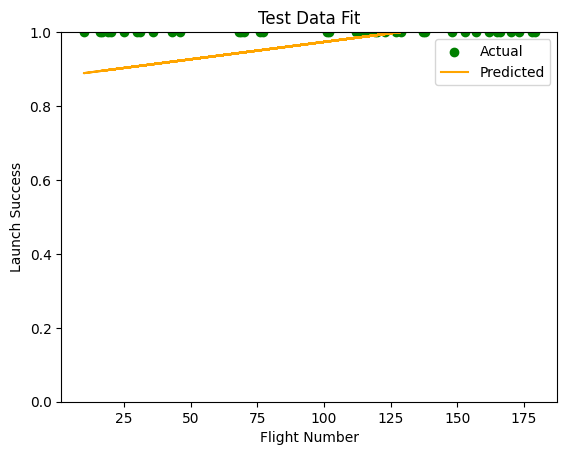

In [53]:
y_test_pred = model.predict(X_test)
plt.scatter(X_test, y_test, color='green', label='Actual')
plt.plot(X_test, y_test_pred, color='orange', label='Predicted')
plt.xlabel('Flight Number')
plt.ylabel('Launch Success')
plt.title('Test Data Fit')
plt.ylim(0.0, 1.0)
plt.legend()
plt.show()

# Step8: Calculating Accuracy

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

print(f'Mean Squared Error: {mean_squared_error(y_test, y_test_pred):.4f}')
print(f'R² Score: {r2_score(y_test, y_test_pred)*100}')

Mean Squared Error: 0.0034
R² Score: 0.0
